In [1]:
#Notes:
# - Requires Data Folder to work

#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Minimizing Standing Waves:

In [2]:
with open('z_before_absorber.csv') as f:
  lines = (line for line in f if not line.startswith(' #'))
  z1 = np.loadtxt(lines, delimiter=' ')
z1 = z1.T

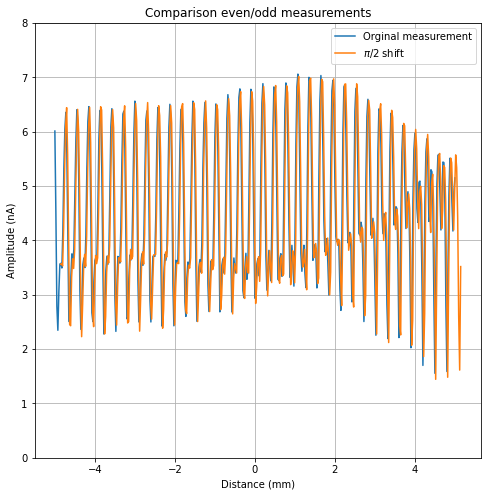

In [5]:
plt.figure(figsize=(8,8))
plt.title("Comparison even/odd measurements")
plt.plot(z1[2][0::2], z1[4][0::2], label=("Orginal measurement"))
plt.plot(z1[2][1::2], z1[4][1::2], label=("$\pi$/2 shift"))
plt.ylim(0,8)
plt.ylabel("Amplitude (nA)")
plt.xlabel("Distance (mm)")
plt.legend()
plt.grid()
plt.show()

In [23]:
#Define E1 and E2:
E11 = z1[4][::2]*np.exp(z1[5][::2]*1j)     #E = A*e^(psi*i)
E12 = z1[4][1::2]*np.exp(z1[5][1::2]*1j)   #E = A*e^((psi+pi/2)*i)

#Find Ec, zc and tc:
Ec1 = (E11+E12*1j)/2                       #Ec = (E1+i*E2)
dEc1 = (E11-E12*1j)/2                      #dEc = (E1-i*E2)                 #Ec = (E1+i*E2)
zc1 = (z1[2][::2]+z1[2][1::2])/2           #zc = (z1 + z2)/2
tc1 = (z1[3][::2]+z1[3][1::2])/2           #tc = (t1 + z2)/2

#Find A and phi on complex plane:
A1 = np.sqrt(Ec1.real**2+Ec1.imag**2)      #r = sqrt(x^2+y^2)
dA1 = np.sqrt(dEc1.real**2+dEc1.imag**2)      #r = sqrt(x^2+y^2)
phi1 = np.angle(Ec1)                       #phi = arctan(y/x)
dphi1 = np.angle(dEc1)                       #phi = arctan(y/x)
rho1 = E11/E12
delta1 = np.angle(rho1)

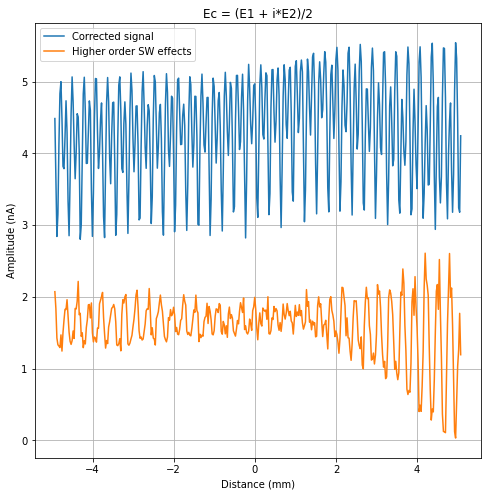

In [25]:
plt.figure(figsize=(8,8))
plt.title("Ec = (E1 + i*E2)/2")
plt.plot(zc1, A1, label="Corrected signal")
plt.plot(zc1, dA1, label="Higher order SW effects")
plt.ylabel("Amplitude (nA)")
plt.xlabel("Distance (mm)")
plt.grid()
plt.legend()
plt.show()

### Performance after placement of absorbers:

In [73]:
with open('z_after_absorber7.csv') as f:
  lines = (line for line in f if not line.startswith(' #'))
  z2 = np.loadtxt(lines, delimiter=' ')
z2 = z2.T

In [74]:
#Define E1 and E2:
E21 = z2[4][::2]*np.exp(z2[5][::2]*1j)     #E = A*e^(psi*i)
E22 = z2[4][1::2]*np.exp(z2[5][1::2]*1j)   #E = A*e^((psi+pi/2)*i)

#Find Ec, zc and tc:
Ec2 = (E21+E22*1j)/2                       #Ec = (E1+i*E2)
dEc2 = (E21-E22*1j)/2                      #dEc = (E1-i*E2)                 #Ec = (E1+i*E2)
zc2 = (z2[2][::2]+z2[2][1::2])/2           #zc = (z1 + z2)/2
tc2 = (z2[3][::2]+z2[3][1::2])/2           #tc = (t1 + z2)/2

#Find A and phi on complex plane:
A2 = np.sqrt(Ec2.real**2+Ec2.imag**2)      #r = sqrt(x^2+y^2)
dA2 = np.sqrt(dEc2.real**2+dEc2.imag**2)   #r = sqrt(x^2+y^2)
phi2 = np.angle(Ec2)                       #phi = arctan(y/x)
dphi2 = np.angle(dEc2)                     #dphi = arctan(y/x)
rho2 = E21/E22
delta2 = np.angle(rho2)

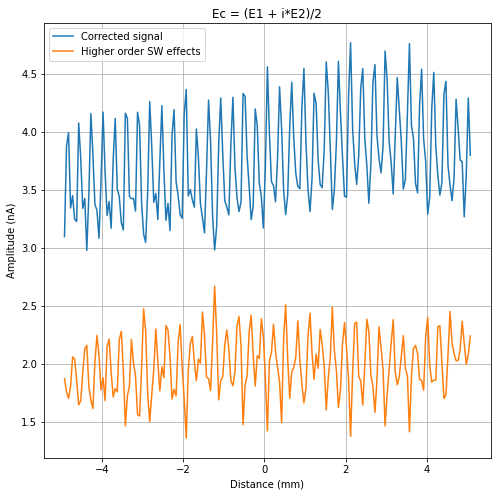

In [75]:
plt.figure(figsize=(8,8))
plt.title("Ec = (E1 + i*E2)/2")
plt.plot(zc2, A2, label="Corrected signal")
plt.plot(zc2, dA2, label="Higher order SW effects")
plt.ylabel("Amplitude (nA)")
plt.xlabel("Distance (mm)")
plt.grid()
plt.legend()
plt.show()

### Time drift:

In [125]:
with open('Driftscan2.csv') as f:
    lines = (line for line in f if not line.startswith(' #'))
    t = np.loadtxt(lines, delimiter=' ')
    t = t.T

In [126]:
#Define E1 and E2:
Et1 = t[4][::2]*np.exp(t[5][::2]*1j)     #E = A*e^(psi*i)
Et2 = t[4][1::2]*np.exp(t[5][1::2]*1j)   #E = A*e^((psi+pi/2)*i)

#Find Ec, zc and tc:
Et = (Et1+Et2*1j)/2                       #Ec = (E1+i*E2)
zt = (t[2][::2]+t[2][1::2])/2           #zc = (z1 + z2)/2
tt = (t[3][::2]+t[3][1::2])/2           #tc = (t1 + z2)/2

At = np.sqrt(Et.real**2+Et.imag**2)      #r = sqrt(x^2+y^2)
phit = np.arctan(Et.imag/Et.real)        #phi = arctan(y/x)

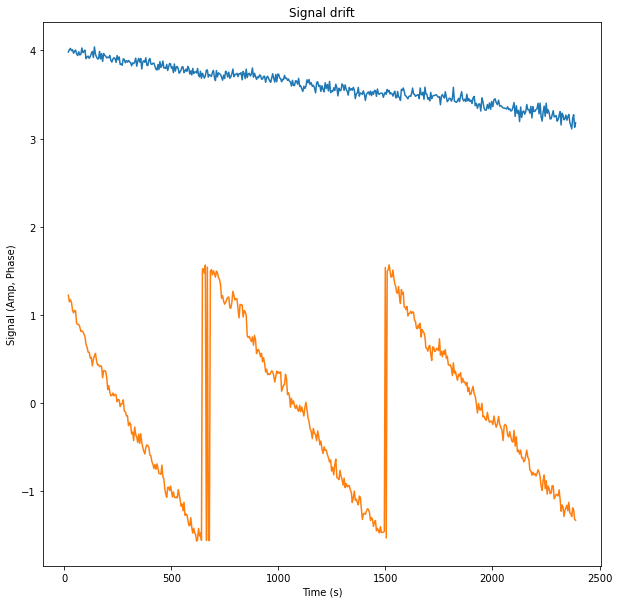

In [137]:
p = At/At[0]
phid = phit-phit[0]

Etd = Et/(p*np.exp(phid*-1j))
Atd = np.sqrt(Etd.real**2+Etd.imag**2)      #r = sqrt(x^2+y^2)
phitd = np.arctan(Etd.imag/Etd.real)        #phi = arctan(y/x)
          
plt.figure(figsize=(10,10))
plt.title("Signal drift")
plt.plot(tt, At, label="Amplitude (nA)")
plt.plot(tt, phit, label="Phase (rad)")
plt.ylabel("Signal (Amp, Phase)")
plt.xlabel("Time (s)")
plt.show()

In [139]:
with open('Planar_scan2.csv') as f:
  lines = (line for line in f if not line.startswith(' #'))
  p = np.loadtxt(lines, delimiter=' ')
p = p.T

B = np.reshape(p[4][::2][1:], (13, 13))

In [152]:
#Define E1 and E2:
Ep1 = p[4][::2]*np.exp(p[5][::2]*1j)     #E = A*e^(psi*i)
Ep2 = p[4][1::2]*np.exp(p[5][1::2]*1j)   #E = A*e^((psi+pi/2)*i)

#Find Ec, zc and tc:
Ep = (Ep1+Ep2*1j)/2                      #Ec = (E1+i*E2)
zp = (t[2][::2]+t[2][1::2])/2            #zc = (z1 + z2)/2
tp = (t[3][::2]+t[3][1::2])/2            #tc = (t1 + z2)/2

Ap = np.sqrt(Ep.real**2+Ep.imag**2)      #r = sqrt(x^2+y^2)
phip = np.angle(Ep.imag/Ep.real)         #phi = arctan(y/x)

C = np.reshape(Ap[1:], (13, 13))

C:\Users\Ruurd\AppData\Local\Temp\ipykernel_18188\3905563915.py:11: RuntimeWarning: invalid value encountered in true_divide
  phip = np.angle(Ep.imag/Ep.real)         #phi = arctan(y/x)


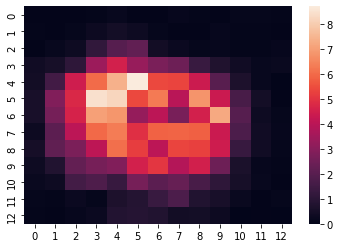

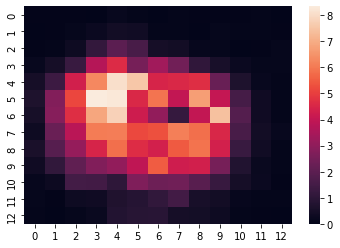

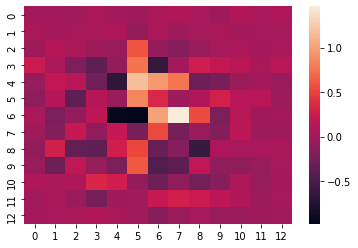

In [154]:
#2D heatmap:
ax = sns.heatmap(B)
plt.show()

ax = sns.heatmap(C)
plt.show()

ax = sns.heatmap(B-C)
plt.show()